## importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## setting pandas to display all columns(optional)

In [3]:
pd.set_option('display.max_columns', None)

## loading the data

In [4]:
df = pd.read_excel('Canada.xlsx', 
                   sheet_name=1,
                   skiprows=20, 
                   skipfooter=2)
df

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,1829,2162,3404,7583,5907,2741,1406,1411,3004,3801,5870,5416,6547,5105,3723,2462,1752,1631,1419,1803,2117,2291,1713,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59


## preprocessing the data


->optional steps
   ->rename column
   ->drop non-essential columns
   ->add new columns
   ->check and change data types
   ->check for missing values

## rename columns according to the problem statement

In [5]:
df = df.rename(columns={
    'OdName': 'country',
    'AreaName': 'continent',
    'RegName': 'region',
    'DevName': 'status',
}).copy()

# drop non-essential column

In [6]:
df.columns

Index([     'Type',  'Coverage',   'country',      'AREA', 'continent',
             'REG',    'region',       'DEV',    'status',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [7]:
cols_to_drop = ['Type', 'Coverage', 'AREA', 'REG', 'DEV']
df = df.drop(columns=cols_to_drop)

### add column -total

In [8]:
years = list(range(1980, 2014))
df['total'] = df[years].sum(axis=1)
df.head()

,country,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,15


### check data type

In [9]:
df.info

<bound method DataFrame.info of             country continent              region              status  1980  \
0       Afghanistan      Asia       Southern Asia  Developing regions    16   
1           Albania    Europe     Southern Europe   Developed regions     1   
2           Algeria    Africa     Northern Africa  Developing regions    80   
3    American Samoa   Oceania           Polynesia  Developing regions     0   
4           Andorra    Europe     Southern Europe   Developed regions     0   
..              ...       ...                 ...                 ...   ...   
190        Viet Nam      Asia  South-Eastern Asia  Developing regions  1191   
191  Western Sahara    Africa     Northern Africa  Developing regions     0   
192           Yemen      Asia        Western Asia  Developing regions     1   
193          Zambia    Africa      Eastern Africa  Developing regions    11   
194        Zimbabwe    Africa      Eastern Africa  Developing regions    72   

     1981  1982  19

## check for missing data

if we have missing data in column it will be 
shown in the bar chart ,if there is no missing data,
 the bar chart will be empty

<Axes: >

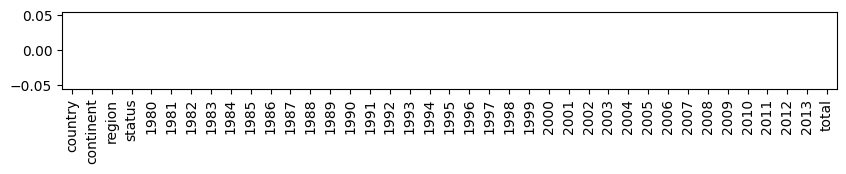

In [10]:
df.isnull().sum().plot(kind='bar', figsize=(10,1))
# if we have missing data in column it will be shown in the bar chart, 
# if there is no missing data, the bar chart will be empty

In [11]:
df.country.tolist()

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'China, Hong Kong Special Administrative Region',
 'China, Macao Special Administrative Region',
 'Colombia',
 'Comoros',
 'Congo',
 'Costa Rica',
 "Côte d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'F

In [12]:
df= df.replace('United Kingdom of Great Britain and Northern Ireland','UK',)

## create a function to load the data and preprocess it in one shot

In [13]:
def load_data():
    # load the data
    df = pd.read_excel('Canada.xlsx', 
                   sheet_name=1,
                   skiprows=20, 
                   skipfooter=2)
    # rename the columns
    df = df.rename(columns={
        'OdName': 'country',
        'AreaName': 'continent',
        'RegName': 'region',
        'DevName': 'status',
    })
    # rename the values accordingly
    df = df.replace('United Kingdom of Great Britain and Northern Ireland','UK',)
    # drop unnecessary columns
    cols_to_drop = ['Type', 'Coverage', 'AREA', 'REG', 'DEV']
    df = df.drop(columns=cols_to_drop)
    # create a new column to display the total
    years = list(range(1980, 2014))
    df['total'] = df[years].sum(axis=1)
    return df # return the dataframe

In [14]:
df= load_data()

## analysis and visualization

### sorting

In [15]:
df = df.sort_values(by='total', ascending=False)

In [16]:
df[['country','total']]

,country,total
79,India,691904
36,China,659962
183,UK,551500
136,Philippines,511391
130,Pakistan,241600
...,...,...
149,San Marino,5
123,New Caledonia,5
109,Marshall Islands,2
191,Western Sahara,2


### immigration pateern for the year 2000

In [17]:
def immigration_pattern_for_year(year = 2010):
    return df[year].plot(
        kind='hist', 
        figsize=(10,5),
        bins = range(0, 35001, 1000), 
        xticks=range(0, 35001, 1000),
        rot=90)

### immigration trend country wise

In [18]:
def immigration_pattern_for_countries(size=100):
    return df[['country','total']].head(size).plot(
        kind='area',
        figsize=(20,5),
        x='country',
        y='total',
        rot=90,
        xticks=range(0, size),
    )

### immigration trend year wise

Text(20, 100000, 'We see upward trend in\nimmigration over the\nyears 1980-2013')

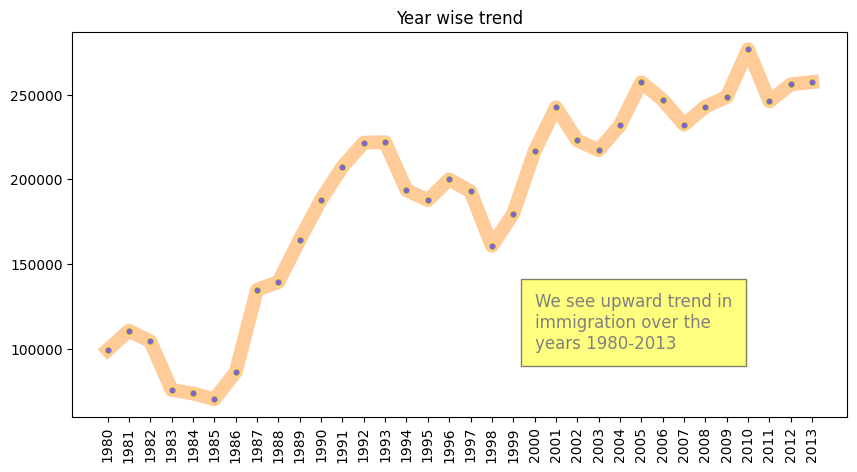

In [19]:
years = list(range(1980, 2014))
a = df[years].sum().plot(
    kind='line', 
    figsize=(10,5),
    xticks=range(0, 34),
    rot=90,
    color='#ff9933',
    marker='o', # `x, +, *, s, d, o, ., 1, 2, 3, 4, h, H, _`
    ms=5, # or markersize=5
    lw=10, # or linewidth=5
    alpha=0.5, # transparency
    linestyle='-', # or '--' or '-.' or ':'
    markerfacecolor='blue',
    markeredgecolor='yellow',
    title = 'Year wise trend'
)
a.text(20, 100000, 'We see upward trend in\nimmigration over the\nyears 1980-2013', 
       fontsize=12, color='gray',
       bbox=dict(facecolor='yellow', alpha=0.5, pad=10))

### comparing countries immigration trend

In [20]:
df.query('country == "France"')

,country,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
63,France,Europe,Western Europe,Developed regions,1729,2027,2219,1490,1169,1177,1298,1658,2038,2332,2177,2911,3487,3709,2759,3332,2623,2473,3214,3343,3765,3806,3463,3568,4391,4429,4002,4290,4532,5051,4646,4080,6280,5623,109091


### optional -> fixed the numeric to country name

In [21]:
df.set_index('country', inplace=True)
df.head()

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
UK,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [22]:
def country_wise_immigration(countries=['Japan','France']):
    ax = df.loc[countries][years].T.plot(
    figsize=(10,5),
    legend=False,
    marker='o', # `x, +, *, s, d, o, ., 1, 2, 3, 4, h, H, _`
    ms=10, # or markersize=5
    lw=5, # or linewidth=5
    alpha=0.3, # transparency
    linestyle='-', # or '--' or '-.' or ':'
    markerfacecolor='blue',
    markeredgecolor='yellow',
    title = " vs ".join(countries),
    )
    df.loc[countries][years].T.plot(kind='area', 
        ax=ax, 
        stacked=False,
        xticks=range(0, 34),
        rot=90
    )

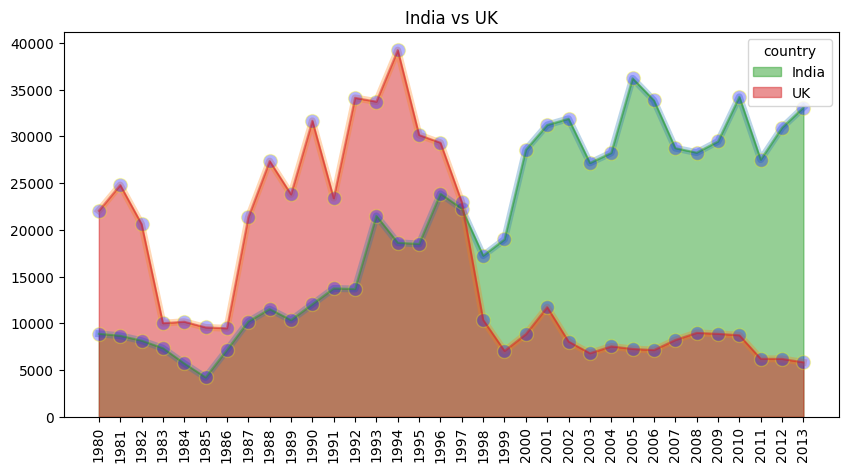

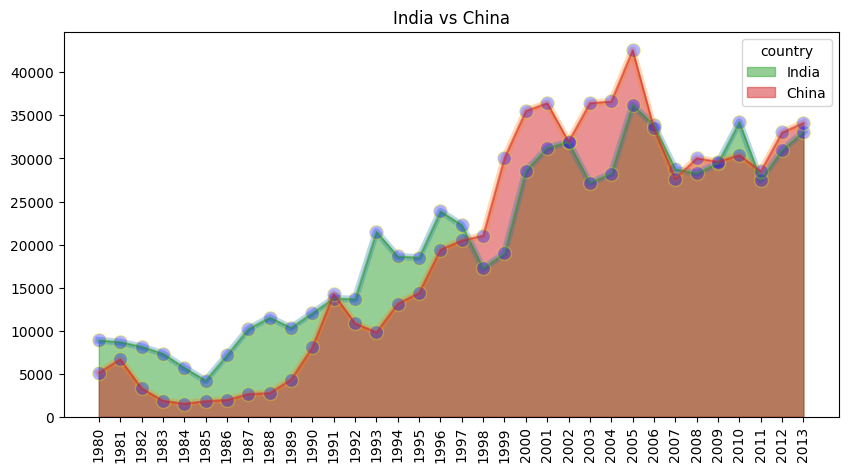

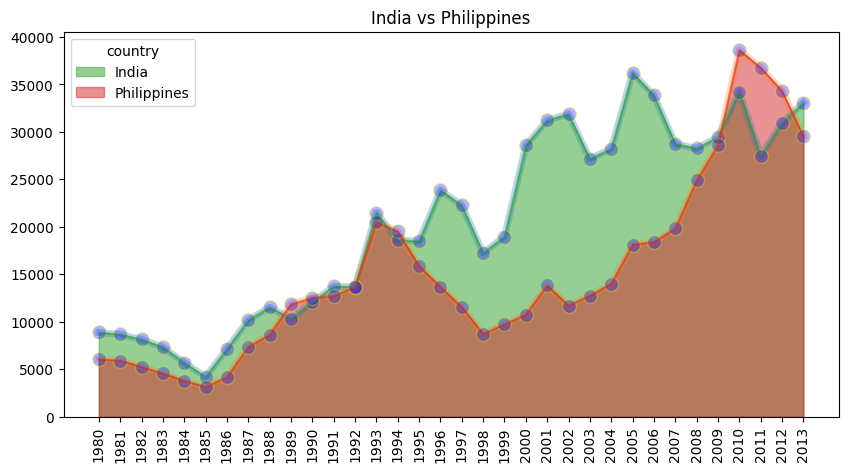

In [23]:
country_wise_immigration(['India','UK'])
country_wise_immigration(['India','China'])
country_wise_immigration(['India','Philippines'])

In [24]:
df

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
UK,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2


In [25]:
df

,continent,region,status,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
UK,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2


## Grouping

In [28]:
df['continent'].value_counts()

continent
Africa                             54
Asia                               49
Europe                             43
Latin America and the Caribbean    33
Oceania                            14
Northern America                    2
Name: count, dtype: int64

<Axes: ylabel='count'>

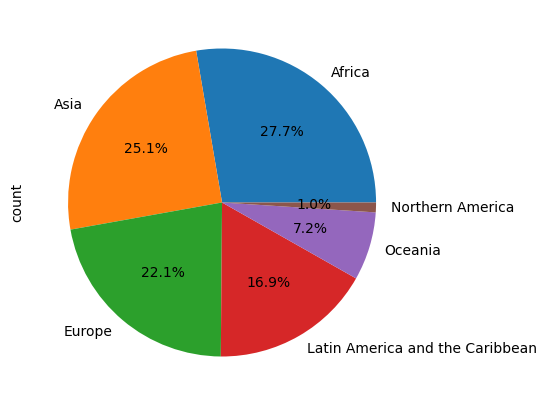

In [30]:
df['continent'].value_counts().plot(kind='pie', figsize=(5,5),autopct='%.1f%%') # categorical distribution

<Axes: xlabel='region'>

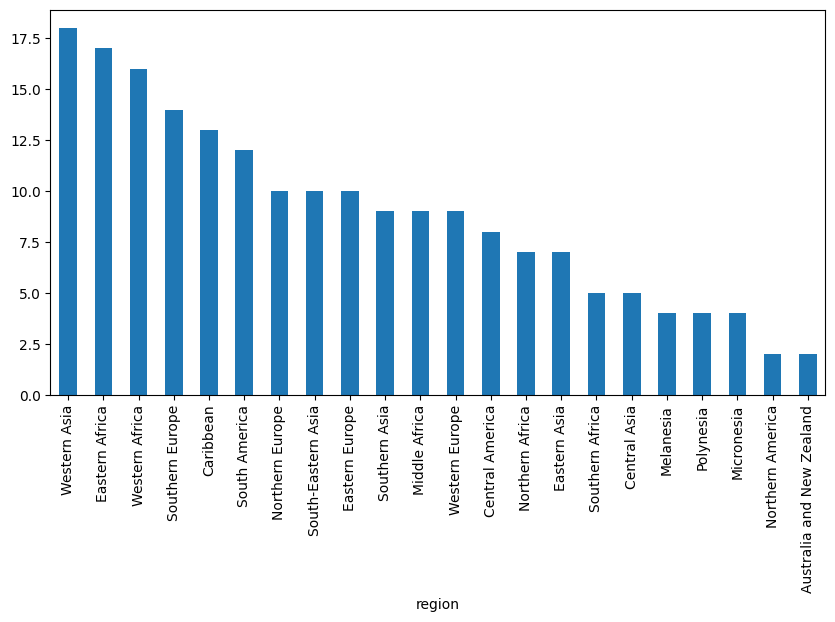

In [31]:
df['region'].value_counts().plot(kind='bar',figsize=(10,5))

<Axes: ylabel='count'>

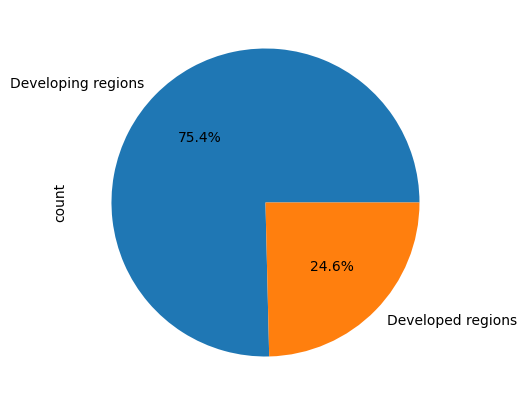

In [32]:
df['status'].value_counts().plot(kind='pie',figsize=(5,5),autopct='%.1f%%')

## total immegration between developing regions and developed region

## group by or pivot

In [36]:
df.groupby('status')['total'].sum()

status
Developed regions     1714011
Developing regions    4695142
Name: total, dtype: int64

<Axes: ylabel='total'>

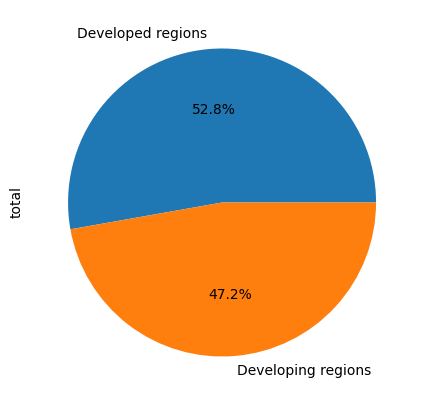

In [38]:
df.groupby('status')['total'].mean().plot(kind='pie',figsize=(5,5),autopct='%.1f%%')

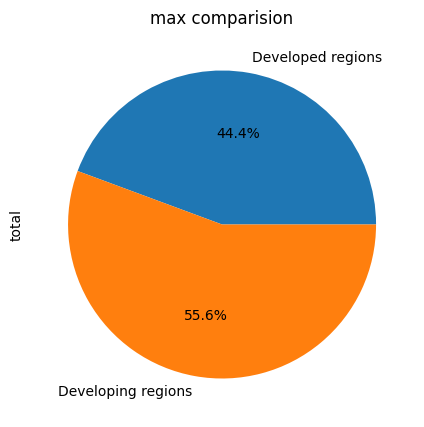

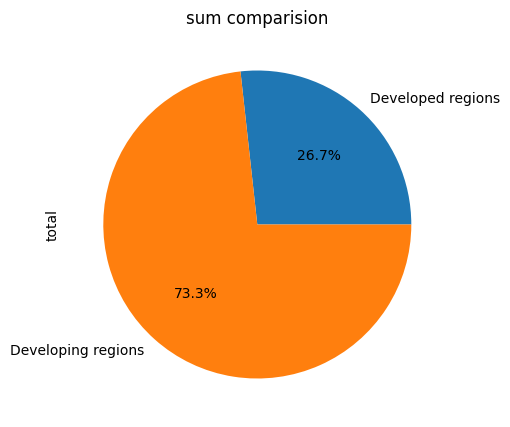

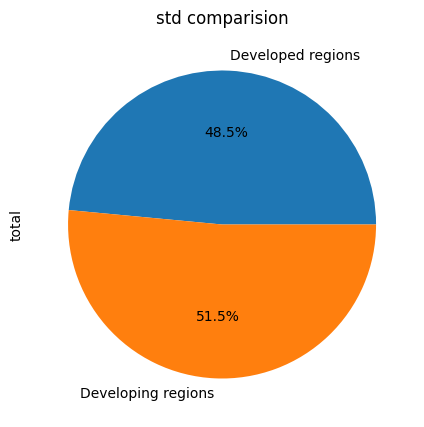

In [52]:
df.groupby('status')['total'].max().plot(kind='pie',figsize=(5,5),autopct='%.1f%%',title='max comparision')
plt.show()
df.groupby('status')['total'].sum().plot(kind='pie',figsize=(5,5),autopct='%.1f%%',title='sum comparision')
plt.show()
df.groupby('status')['total'].std().plot(kind='pie',figsize=(5,5),autopct='%.1f%%',title='std comparision')
plt.show()

<Axes: >

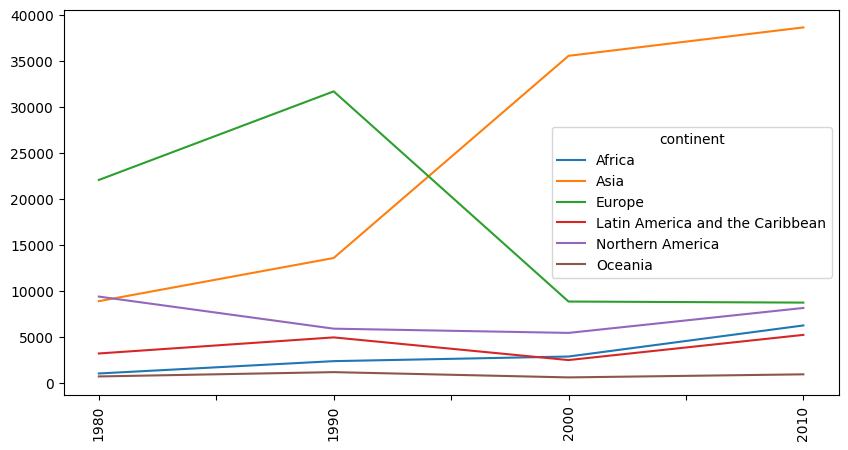

In [49]:
cdf=df.groupby('continent')[[1980,1990,2000,2010]].max()
cdf.T.plot(kind='line',figsize=(10,5),rot=90)

<Axes: >

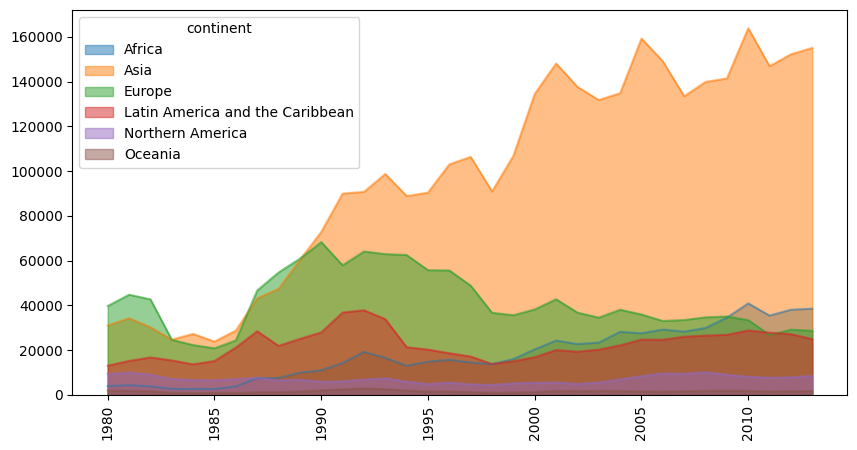

In [55]:
cdf=df.groupby('continent')[years].sum()
cdf.T.plot(kind='area',figsize=(10,5),rot=90, stacked=False)

## pivot tabale


In [56]:
df.pivot_table(index='continent',columns='status',values='total',aggfunc='sum')

status,Developed regions,Developing regions
continent,,
Africa,NaN,618948.0
Asia,27707.0,3290087.0
Europe,1410947.0,NaN
Latin America and the Caribbean,NaN,765148.0
Northern America,241142.0,NaN
Oceania,34215.0,20959.0


array([<Axes: ylabel='Developed regions'>,
       <Axes: ylabel='Developing regions'>], dtype=object)

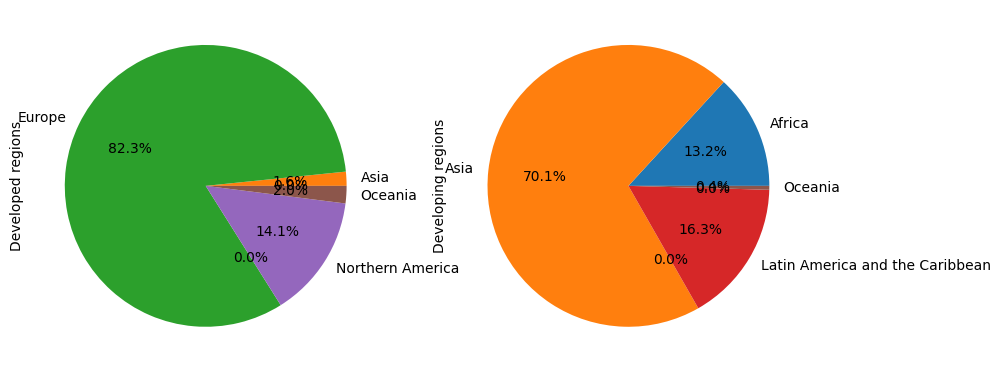

In [60]:
df.pivot_table(index='continent',columns='status',values='total',aggfunc='sum').plot(kind='pie',
                                                                                     subplots=True,
                                                                                     figsize=(10,5),
                                                                                     autopct='%.1f%%',
                                                                                     legend=False)